In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

### Homework Assignment

Create 2 models using the Diabetes dataset from Scikit Learn Package.
- 1st model must contain all the predictors
- 2nd model can contain fewer predictors by analyzining concepts like VIF, Correlation Matrix.

**Points to focus**

Data Should be splitted into test and train set in both the models.
Correlation heatmap must be shown.
R-squared, RMSE, intercept and coefficients must be explicitly presented.

In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

data['level'] = diabetes.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,level
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


**Look for any missing values in the data.**

In [6]:
data.isnull().any()

age      False
sex      False
bmi      False
bp       False
s1       False
s2       False
s3       False
s4       False
s5       False
s6       False
level    False
dtype: bool

### **Exploratory Data Analysis**

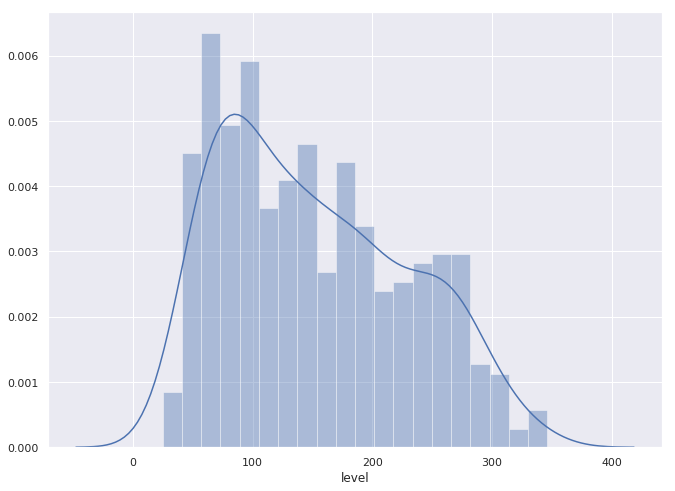

In [7]:
sns.set(rc={'figure.figsize':(11,8)})

sns.distplot(data['level'], bins=20)
plt.show()

* Looking for the correlation between the predictors with the help of correlation matrix

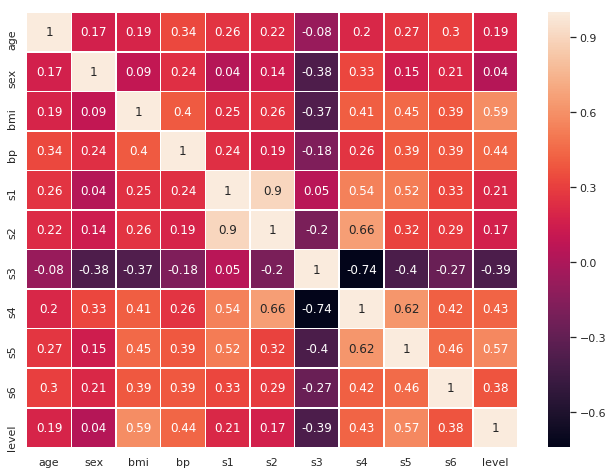

In [8]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data = correlation_matrix, annot=True, linewidths = 0.5)

* From Correlation matrix, it can be seen that level is related to bmi, bp, s4, s5, s3. 

**Model 1**: 

Taking all the predictors

In [0]:
# Concatenating the predictors in one dataframe.
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
Y = data['level']


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
# Splitting the dataset, 80% of data goes into training set and 20% into test test. Set the seed to 5 for reproducibility.

**Creating Prediction Model**

In [10]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model1 = sm.OLS(Y_train, X_train).fit()

# Print out the statistics
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  level   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     35.82
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           1.62e-47
Time:                        05:40:31   Log-Likelihood:                -1904.6
No. Observations:                 353   AIC:                             3831.
Df Residuals:                     342   BIC:                             3874.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.2218      2.898     52.523      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Predict the y values of training and test set**

In [11]:
X_test = sm.add_constant(X_test)
Y_train_pred = model1.predict(X_train)
Y_test_pred = model1.predict(X_test)

# Evaluating Root Mean Square Error
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print('The RMSE is: {}'.format(rmse_train))

rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print('The RMSE is: {}'.format(rmse))

# Evaluating R squared
r2_train = r2_score(Y_train, Y_train_pred)
print('The r square is:{}'.format(r2_train))

r2 = r2_score(Y_test, Y_test_pred)
print('The r square is:{}'.format(r2))

The RMSE is: 53.33849884829917
The RMSE is: 54.603896119844435
The r square is:0.5115527825885677
The r square is:0.5271561853905228


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### **Variance Inflation Factors**

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(X.columns)):
  v = vif(np.matrix(X), i)
  print('Variation Inflation Factor for {}: {}'.format(X.columns[i], round(v, 2)) )

Variation Inflation Factor for age: 1.22
Variation Inflation Factor for sex: 1.28
Variation Inflation Factor for bmi: 1.51
Variation Inflation Factor for bp: 1.46
Variation Inflation Factor for s1: 59.2
Variation Inflation Factor for s2: 39.19
Variation Inflation Factor for s3: 15.4
Variation Inflation Factor for s4: 8.89
Variation Inflation Factor for s5: 10.08
Variation Inflation Factor for s6: 1.48


**Model 2** : 

Taking age, sex, bmi, bp, s4, s6, s3, s5 as our predictors.

In [0]:
# Concatenating the predictors in one dataframe.
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
X = X.drop(['s2', 's1'], axis = 1)
Y = data['level']


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
# Splitting the dataset, 80% of data goes into training set and 20% into test test. Set the seed to 5 for reproducibility.

**Creating prediction model** 

In [20]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model1 = sm.OLS(Y_train, X_train).fit()

# Print out the statistics
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  level   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     43.94
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           2.94e-48
Time:                        05:44:20   Log-Likelihood:                -1906.8
No. Observations:                 353   AIC:                             3832.
Df Residuals:                     344   BIC:                             3866.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.2665      2.906     52.390      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Predict the y values of training and test set**

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
X_test = sm.add_constant(X_test)
Y_train_pred = model1.predict(X_train)
Y_test_pred = model1.predict(X_test)

# Evaluating Root Mean Square Error
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print('The RMSE is: {}'.format(rmse_train))

rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print('The RMSE is: {}'.format(rmse))

# Evaluating R squared
r2_train = r2_score(Y_train, Y_train_pred)
print('The r square is:{}'.format(r2_train))

r2 = r2_score(Y_test, Y_test_pred)
print('The r square is:{}'.format(r2))

The RMSE is: 53.67167108546865
The RMSE is: 55.03815761747875
The r square is:0.5054316762967697
The r square is:0.5196052816067762


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### **Variance Inflation Factors**

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(X.columns)):
  v = vif(np.matrix(X), i)
  print('Variation Inflation Factor for {}: {}'.format(X.columns[i], round(v, 2)) )

Variation Inflation Factor for age: 1.21
Variation Inflation Factor for sex: 1.27
Variation Inflation Factor for bmi: 1.49
Variation Inflation Factor for bp: 1.45
Variation Inflation Factor for s3: 2.43
Variation Inflation Factor for s4: 3.15
Variation Inflation Factor for s5: 1.98
Variation Inflation Factor for s6: 1.48
